In [35]:
"""Functions for downloading and reading MNIST data."""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import gzip
import os
import tempfile

import numpy
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets

In [36]:
mnist = read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Softmax回归模型
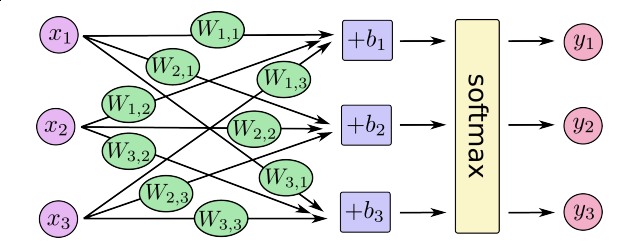
28 * 28 = 784  &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;
10

In [43]:
x = tf.placeholder("float", [None, 784])
# label
y = tf.placeholder("float", [None, 10])

w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

y_hat = tf.nn.softmax(tf.matmul(x, w) + b)

cross_entropy = -tf.reduce_sum(y * tf.log(y_hat))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

init_op = tf.global_variables_initializer()
# sess = tf.Session()
# sess.run(init_op)
# for _ in range(1000):
#     batch_xs, batch_ys = mnist.train.next_batch(100)
#     sess.run(train_step, feed_dict={x: batch_xs, y:batch_ys})
    
# correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print (sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
# sess.close()
with tf.Session() as sess:
    sess.run(init_op)
    for _ in range(10):
        batch = mnist.train.next_batch(100)
        train_step.run(feed_dict={x: batch[0], y: batch[1]})
        
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print (accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}))

0.147
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098
0.098


## 多层卷积网络模型

In [ ]:
def weight_variable(shape):
    init = tf.truncated_normal(shape, stddev = 0.1)
    return tf.Variable(init)
def bias_variable(shape):
    init = tf.constant(0.1, shape = shape)
    return tf.Variable(init)